In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [46]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [47]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [48]:
# preview the data for a big picture overview

# Create and connect the inspector variable to the the hawaii.sqlite engine
inspector = inspect(engine)

# Get the database table names
tables = inspector.get_table_names()

#Print column names and types found within the tables via the inspector
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [49]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [50]:
# Save a reference to the measurement and station table as "measurment" and "station"
Measurement = Base.classes.measurement
Station = Base.classes.station

In [51]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [52]:
# run a query to get the most recent DATE in the dataset
query = "SELECT max(date) from measurement;"

data = engine.execute(text(query))
for record in data:
    print(record)

('2017-08-23',)


In [53]:
# Query the previous 12 months precipitation data from the measurements table 
# Set the most recent date to 2017-08-23, and 12 months prior date to 2016-08-23
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date

query = """SELECT
                date,
                station,
                prcp
            FROM
                measurement
            WHERE
                date >= "2016-08-23";
"""

# reflect an existing database into a new model
# reflect the tables

df = pd.read_sql(text(query), con=engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


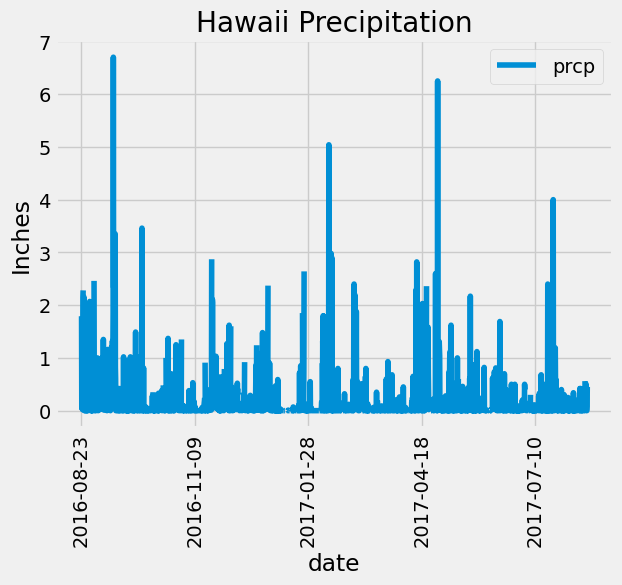

In [54]:
# Use Pandas Plotting with Matplotlib to plot the data
df = df.sort_values(by="date")

df.plot(kind="line", x ="date", y="prcp", ylabel="Inches", title="Hawaii Precipitation", rot=90)
plt.show()

In [55]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [56]:
# Design a query to calculate the total number of stations in the dataset

query = "SELECT count(id) from station;"

data = engine.execute(text(query))
for record in data:
    print(record) 

(9,)


In [57]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = """SELECT
                station,
                count(id) as obs_num
           FROM
              measurement
           GROUP BY
               station
           ORDER BY
              obs_num desc;
"""

# reflect an existing database into a new model
# reflect the tables

df2 = pd.read_sql(text(query), con=engine)
df2.head(12)

,station,obs_num
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [58]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """SELECT
               min(tobs),
               max(tobs),
               avg(tobs)
           FROM
              measurement
         WHERE
            station = "USC00519281"
           
"""

# reflect an existing database into a new model
# reflect the tables

df3 = pd.read_sql(text(query), con=engine)
df3

,min(tobs),max(tobs),avg(tobs)
0,54.0,85.0,71.663781


In [59]:
data = engine.execute(text(query))
for record in data:
    print(record) 

(54.0, 85.0, 71.66378066378067)


In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query = """SELECT
                date,
                station,
                tobs
            FROM
                measurement
            WHERE
                date >= "2016-08-23"
                AND station = "USC00519281"
            ORDER BY 
                date asc;
"""

df = pd.read_sql(text(query), con=engine)
df.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


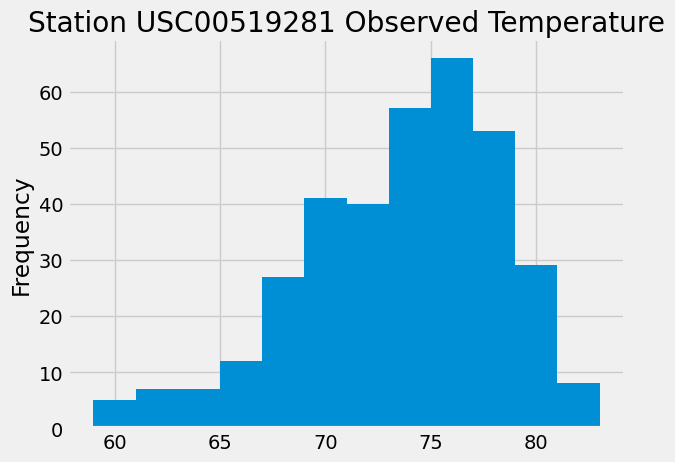

In [61]:
# plot the results as a histogram

df.tobs.plot.hist(bins=12, ylabel="Frequency", title="Station USC00519281 Observed Temperature",)
plt.show()

# Close Session

In [62]:
# Close Session
session.close()